In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [30]:
df=pd.read_csv('titanic_train.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
281,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,NaN,S
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S
664,665,1,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.2500,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S


In [31]:
df.drop(columns=['PassengerId','Name','Ticket','Fare','Cabin'],
        inplace=True)
df.dropna(inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
889,1,1,male,26.0,0,0,C


In [32]:
df['Alone']=(df['Parch']+df['SibSp']).apply(
    lambda x: 1 if x== 0 else 0)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Alone
0,0,3,male,22.0,1,0,S,0
1,1,1,female,38.0,1,0,C,0
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,0
4,0,3,male,35.0,0,0,S,1
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,0
886,0,2,male,27.0,0,0,S,1
887,1,1,female,19.0,0,0,S,1
889,1,1,male,26.0,0,0,C,1


<Axes: xlabel='Sex', ylabel='Survived'>

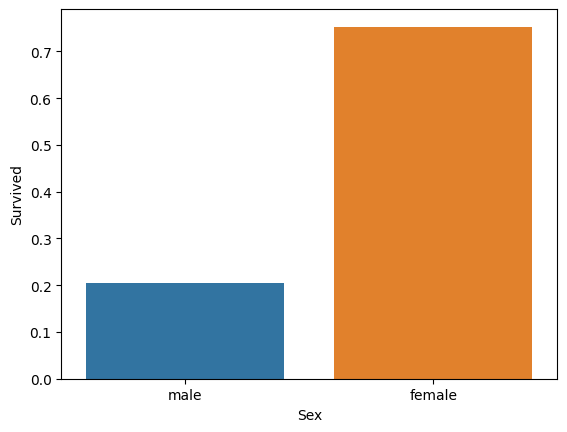

In [33]:
sns.barplot(x='Sex',y='Survived',data=df,errorbar=None)

<Axes: xlabel='Pclass', ylabel='Survived'>

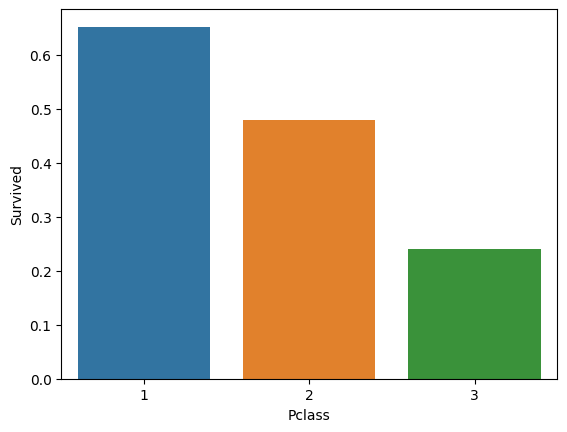

In [34]:
sns.barplot(x='Pclass',y='Survived',data=df,errorbar=None)

<Axes: xlabel='Embarked', ylabel='Survived'>

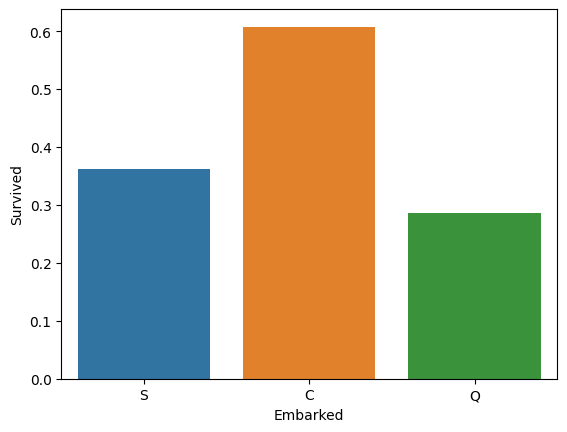

In [35]:
sns.barplot(x='Embarked',y='Survived',data=df,errorbar=None)

[Text(0, 0, 'Not alone'), Text(1, 0, 'Alone')]

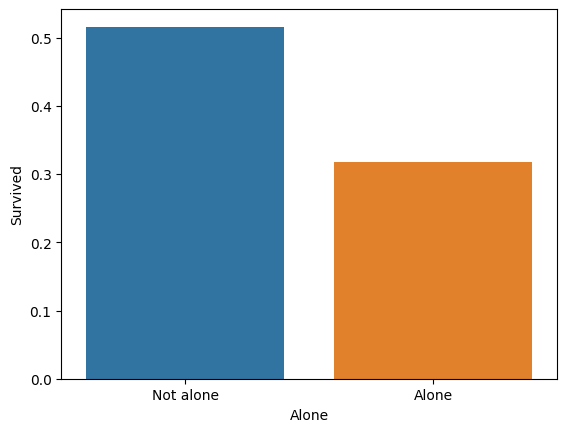

In [36]:
ax=sns.barplot(x='Alone',y='Survived',data=df,errorbar=None)
ax.set_xticklabels(['Not alone','Alone'])

In [37]:
le=preprocessing.LabelEncoder()
le.fit(df['Sex'])
df['Sex']=le.transform(df['Sex'])
sex_labels=dict(zip(le.classes_,le.transform(le.classes_)))

le.fit(df['Embarked'])
df['Embarked']=le.transform(df['Embarked'])
embarked_labels=dict(zip(le.classes_,le.transform(le.classes_)))

print(sex_labels,embarked_labels)

{'female': 0, 'male': 1} {'C': 0, 'Q': 1, 'S': 2}


[Text(0, 0, 'C'), Text(1, 0, 'Q'), Text(2, 0, 'S')]

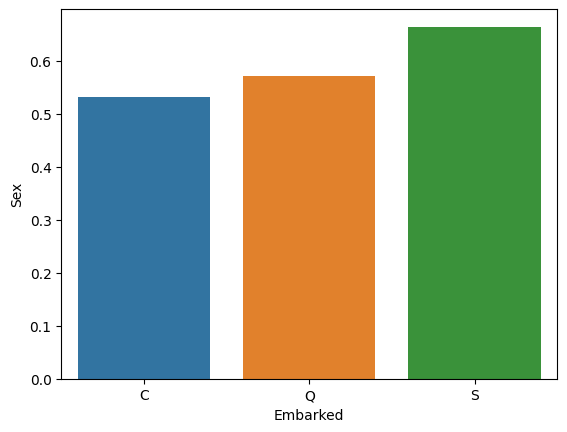

In [38]:
ax=sns.barplot(x='Embarked',y='Sex',data=df,errorbar=None)
ax.set_xticklabels(embarked_labels.keys())

[Text(0, 0, 'C'), Text(1, 0, 'Q'), Text(2, 0, 'S')]

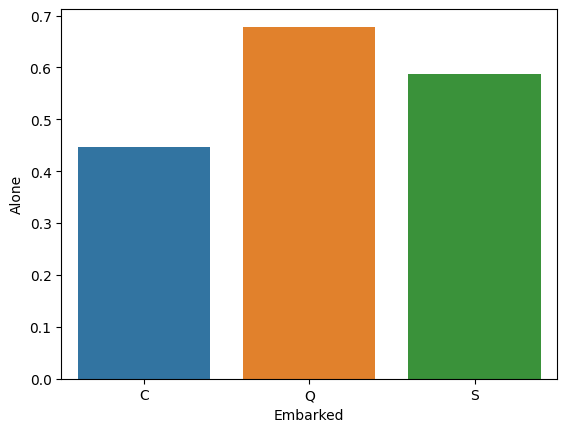

In [39]:
ax=sns.barplot(x='Embarked',y='Alone',data=df,errorbar=None)
ax.set_xticklabels(embarked_labels.keys())

[Text(0, 0, 'female'), Text(1, 0, 'male')]

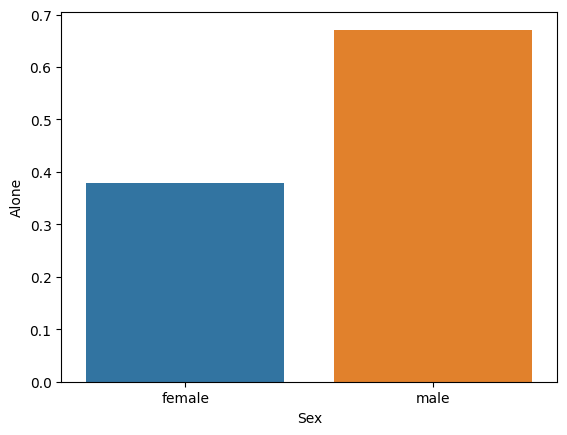

In [40]:
ax=sns.barplot(x='Sex',y='Alone',data=df,errorbar=None)
ax.set_xticklabels(sex_labels.keys())

## Implementacion de Chi-square $\chi^{2}$ y $p$-value

In [41]:
def chi2_by_hand(df,col1,col2):
    df_cont=pd.crosstab(index=df[col1],columns=df[col2])
    display(df_cont)
    # Calculo de grado de libertad
    degree_f=(df_cont.shape[0]-1)*(df_cont.shape[1]-1)

    #Suma de toatles de filas y columnas
    df_cont.loc[:,'Total']=df_cont.sum(axis=1)
    df_cont.loc['Total']=df_cont.sum()
    print('---Observado (O)---')
    display(df_cont)

    #Creacion del alor esperado 
    df_exp=df_cont.copy()
    df_exp.iloc[:,:]=np.multiply.outer(
        df_cont.sum(1).values,df_cont.sum().values)/df_cont.sum().sum()
    print('---Esperado (E)---')
    display(df_exp)

    #Crear valores de chi-square
    df_chi2=((df_cont -df_exp)**2)/df_exp
    df_chi2.loc[:,'Total']=df_chi2.sum(axis=1)
    df_chi2.loc['Total']=df_chi2.sum()

    print('---Chi-square---')
    display(df_chi2)

    #Obtener puntaje de Chi-square
    chi_square_score=df_chi2.iloc[:-1,:-1].sum().sum()

    #p-value
    from scipy import stats

    p=stats.distributions.chi2.sf(chi_square_score,degree_f)

    return chi_square_score,degree_f,p

## Resultados


In [43]:
p=chi2_by_hand(df,'Sex','Survived')
print(f'p-value:{p}')

Survived,0,1
Sex,,
0,64,195
1,360,93


---Observado (O)---


Survived,0,1,Total
Sex,,,
0,64,195,259
1,360,93,453
Total,424,288,712


---Esperado (E)---


Survived,0,1,Total
Sex,,,
0,154.235955,104.764045,259
1,269.764045,183.235955,453
Total,424.000000,288.000000,712


---Chi-square---


Survived,0,1,Total
Sex,,,
0,52.792668,77.722539,130.515207
1,30.183888,44.437390,74.621277
Total,82.976556,122.159929,205.136485


p-value:(205.1364846934008, 1, 1.581266384342472e-46)


Para el caso de ''Superviviente-Sexo'' Rechaza la hipotesis nula.

In [44]:
chi_score, degree_f, p = chi2_by_hand(df,'Embarked','Survived')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

Survived,0,1
Embarked,,
0,51,79
1,20,8
2,353,201


---Observado (O)---


Survived,0,1,Total
Embarked,,,
0,51,79,130
1,20,8,28
2,353,201,554
Total,424,288,712


---Esperado (E)---


Survived,0,1,Total
Embarked,,,
0,77.415730,52.584270,130
1,16.674157,11.325843,28
2,329.910112,224.089888,554
Total,424.000000,288.000000,712


---Chi-square---


Survived,0,1,Total
Embarked,,,
0,9.013553,13.269953,22.283507
1,0.663376,0.976636,1.640012
2,1.616025,2.379148,3.995172
Total,11.292954,16.625737,27.918691


Chi2_score: 27.918691003688615, Degrees of freedom: 2, p-value: 8.660306799267924e-07


Rechaza la hipotesis nula

In [45]:
chi_score, degree_f, p = chi2_by_hand(df,'Alone','Survived')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')


Survived,0,1
Alone,,
0,150,160
1,274,128


---Observado (O)---


Survived,0,1,Total
Alone,,,
0,150,160,310
1,274,128,402
Total,424,288,712


---Esperado (E)---


Survived,0,1,Total
Alone,,,
0,184.606742,125.393258,310
1,239.393258,162.606742,402
Total,424.000000,288.000000,712


---Chi-square---


Survived,0,1,Total
Alone,,,
0,6.487448,9.550965,16.038412
1,5.002758,7.365172,12.367930
Total,11.490206,16.916136,28.406342


Chi2_score: 28.406341862069905, Degrees of freedom: 1, p-value: 9.834262807301776e-08


Rechaza la hipotesis nula

In [46]:
chi_score, degree_f, p = chi2_by_hand(df,'Pclass','Survived')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


---Observado (O)---


Survived,0,1,Total
Pclass,,,
1,64,120,184
2,90,83,173
3,270,85,355
Total,424,288,712


---Esperado (E)---


Survived,0,1,Total
Pclass,,,
1,109.573034,74.426966,184
2,103.022472,69.977528,173
3,211.404494,143.595506,355
Total,424.000000,288.000000,712


---Chi-square---


Survived,0,1,Total
Pclass,,,
1,18.954494,27.905227,46.859721
2,1.646095,2.423418,4.069513
3,16.241061,23.910451,40.151512
Total,36.841650,54.239096,91.080745


Chi2_score: 91.08074548791019, Degrees of freedom: 2, p-value: 1.6675060315554636e-20


Rechaaz la hipotesis nula

## Conclusiones


1. Las parejas categoricas rechazan la hipotesis nula, por tanto la supervivencia al desastre del Titanic depende del sexo de la persona, el sitio de embarco y si la persona tenia compañia familiar o no o si la persona pertenecia a primera segunda o tercera clase.

2. El programa muestra cuan significante para la superviviencia de la catastrofe es pertenecer a alguna de las caracteristicas con mayor probabilidad de supervivencia. Pero ademas de mostrar la correlacion entre las variables y el objetivo esta validando los resultados a-priori de los graficos de barras.
